# 6.3 Geographic Visualization
This script contains the following:
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

# 1.Importing Data and libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import json
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".geojson"

country_geo = r'/Users/manuellituma/Airbnb Amsterdam/02 Data/Original Data/neighbourhoods.geojson'

In [30]:
#  JSON file contents here too:

f = open(r'/Users/manuellituma/Airbnb Amsterdam/02 Data/Original Data/neighbourhoods.geojson')

# returns JSON object asa dictionary
data = json.load(f)

# Iterating through the json list
for feature in data['features']:
    properties = feature['properties']
    print(properties)

{'neighbourhood': 'Bijlmer-Oost', 'neighbourhood_group': None}
{'neighbourhood': 'Noord-Oost', 'neighbourhood_group': None}
{'neighbourhood': 'Noord-West', 'neighbourhood_group': None}
{'neighbourhood': 'Oud-Noord', 'neighbourhood_group': None}
{'neighbourhood': 'IJburg - Zeeburgereiland', 'neighbourhood_group': None}
{'neighbourhood': 'Centrum-West', 'neighbourhood_group': None}
{'neighbourhood': 'Oostelijk Havengebied - Indische Buurt', 'neighbourhood_group': None}
{'neighbourhood': 'Centrum-Oost', 'neighbourhood_group': None}
{'neighbourhood': 'Oud-Oost', 'neighbourhood_group': None}
{'neighbourhood': 'Watergraafsmeer', 'neighbourhood_group': None}
{'neighbourhood': 'Gaasperdam - Driemond', 'neighbourhood_group': None}
{'neighbourhood': 'Westerpark', 'neighbourhood_group': None}
{'neighbourhood': 'Bijlmer-Centrum', 'neighbourhood_group': None}
{'neighbourhood': 'De Pijp - Rivierenbuurt', 'neighbourhood_group': None}
{'neighbourhood': 'Zuid', 'neighbourhood_group': None}
{'neighbourh

In [5]:
#Creating a path for this project
path = r'/Users/manuellituma/Airbnb Amsterdam'

In [6]:
# Import the listings merge data

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_merge.csv'))

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,...,15,https://www.airbnb.com/rooms/2818,t,"Upon arriving in Amsterdam, one can imagine as...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",NaN,"$1,500.00",Amsterdam
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,...,20,https://www.airbnb.com/rooms/3209,f,I am a freelance radio producer and journalist...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",$543.00,"$2,000.00",Amsterdam
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,...,1000,https://www.airbnb.com/rooms/20168,f,Secondary phone nr. + (Phone number hidden by ...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",NaN,NaN,Amsterdam
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,...,60,https://www.airbnb.com/rooms/25428,f,"We are a retired couple who live in NYC, and h...",within a few hours,100.0,"Amsterdam, North Holland, Netherlands",$650.00,"$2,000.00",Amsterdam
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,...,730,https://www.airbnb.com/rooms/27886,t,"Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",$810.00,"$2,500.00",Amsterdam


In [8]:
df.shape

(20030, 35)

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'listing_url', 'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'street', 'weekly_price', 'monthly_price',
       'market'],
      dtype='object')

# 2. Data wrangling

In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
property_type                      object
accommodates                        int64
first_review                       object
review_scores_value               float64
review_scores_cleanliness         float64
review_scores_location            float64
review_scores_accuracy            float64
review_scores_communication       float64
review_scores_checkin             

In [11]:
df.rename(columns = {'price' : 'average_price'},inplace= True)
df.average_price = df.average_price.round(decimals=0)

# 3. Data cleaning


In [12]:
# Check for missing values

df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
average_price                         0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
property_type                         0
accommodates                          0
first_review                       2406
review_scores_value                2659
review_scores_cleanliness          2647
review_scores_location             2660
review_scores_accuracy             2649
review_scores_communication        2652
review_scores_checkin              2661
review_scores_rating               2639


In [13]:
dups = df.duplicated()

In [14]:
dups.shape

(20030,)

<AxesSubplot:xlabel='average_price', ylabel='Count'>

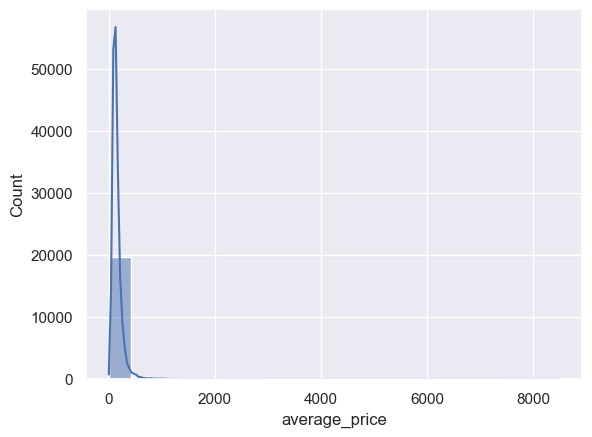

In [15]:
sns.histplot(df['average_price'], bins=20, kde = True) # shows extreme values for 'fat'

In [16]:
# Check how many extreme values

df[df['average_price'] > 1000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,average_price,minimum_nights,...,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
127,258273,Great CENTRAL apartment De Pijp,1358307,Peter,De Pijp - Rivierenbuurt,52.354200,4.891596,Entire home/apt,8000,30,...,30,https://www.airbnb.com/rooms/258273,f,"Hello I'm Peter, I look forward to hearing fro...",NaN,NaN,"Amsterdam, North Holland, Netherlands",NaN,NaN,Amsterdam
2740,4394074,Schitterend Herenhuis op A-locatie!,22806302,Danielle,Zuid,52.354741,4.871979,Entire home/apt,1095,3,...,1125,https://www.airbnb.com/rooms/4394074,f,.,within a day,83.0,"Amsterdam, NH, Netherlands","$5,300.00","$20,000.00",Amsterdam
3321,5587500,Crane Hotel Faralda Amsterdam,21831151,Faralda,Oud-Noord,52.399452,4.894675,Entire home/apt,4500,1,...,1125,https://www.airbnb.com/rooms/5587500,f,Crane Hotel Faralda Amsterdam:\r\n\r\nCrane Ho...,within a day,86.0,"Amsterdam, NH, Netherlands",NaN,NaN,Amsterdam
3328,5611174,Beautiful canalhouse for couples near Leidse p...,23291552,Irene,De Baarsjes - Oud-West,52.367416,4.876162,Entire home/apt,1119,7,...,21,https://www.airbnb.com/rooms/5611174,f,NaN,NaN,NaN,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam
6591,11040717,Verhuurd,45761138,Alice,Buitenveldert - Zuidas,52.324249,4.882948,Entire home/apt,2500,30,...,1125,https://www.airbnb.com/rooms/11040717,f,NaN,NaN,NaN,"Amsterdam, Noord-Holland, Netherlands","$1,000.00","$2,500.00",Amsterdam
7234,12213707,Comfy double room right to city center,42658693,Peter,Oud-Oost,52.359453,4.912028,Entire home/apt,8500,3,...,6,https://www.airbnb.com/rooms/12213707,f,NaN,NaN,NaN,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam
9695,15118725,Apartment in city centre JORDAAN,95809280,JanDirk,Centrum-West,52.371854,4.882358,Entire home/apt,1200,14,...,15,https://www.airbnb.com/rooms/15118725,f,NaN,NaN,NaN,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam
9795,15304003,Luxurious 3br 110m² houseboat in Amsterdam Cen...,1791317,Robert,Centrum-Oost,52.372020,4.903547,Entire home/apt,1190,1,...,1125,https://www.airbnb.com/rooms/15304003,f,Programmer from Amsterdam. likes to travel wit...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam
10008,15626614,One public bedroom,60409350,Alina,Centrum-Oost,52.371641,4.901265,Entire home/apt,3142,1,...,1,https://www.airbnb.com/rooms/15626614,f,NaN,within a day,100.0,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam
10512,16344025,AmsterdamBase,104389329,Jo,Centrum-West,52.372837,4.898500,Entire home/apt,1600,1,...,365,https://www.airbnb.com/rooms/16344025,f,Dear Guest!\r\nI am Jo the hosting management ...,a few days or more,30.0,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam


# 4. Plotting a choropleth

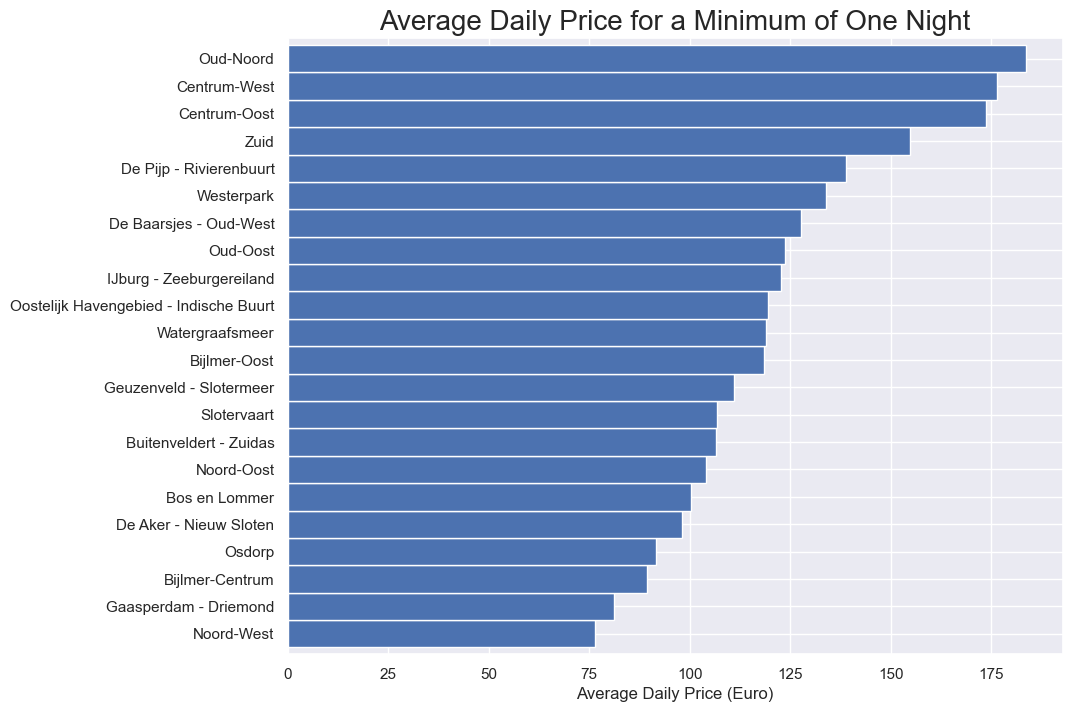

In [17]:
feq = df[df['minimum_nights']==1]
feq = feq.groupby('neighbourhood')['average_price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average Daily Price for a Minimum of One Night", fontsize=20)
plt.xlabel('Average Daily Price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

In [18]:
data_to_plot = df[['neighbourhood','average_price']]
data_to_plot.head()

,neighbourhood,average_price
0,Oostelijk Havengebied - Indische Buurt,59
1,Westerpark,160
2,Centrum-Oost,80
3,Centrum-West,125
4,Centrum-West,150


In [31]:
map1 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'average_price'],
    key_on = 'feature.properties.ADMIN', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name = "average price",
    highlight = True,
    nan_fill_color = 'gray',
    reset = True
).add_to(map1)    
    
folium.LayerControl().add_to(map1)

map1

ValueError: key_on `'properties.ADMIN'` not found in GeoJSON.